In [20]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN 
from sklearn.metrics import silhouette_score 
import numpy as np
import pandas as pd 
import matplotlib.pylab as plt 
import logging 
logging.getLogger('matpplotlib.font_manager').disable = True

credit = pd.read_csv('credit_card.csv')
credit.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [21]:
print("data null \n", credit.isnull().sum())
print("data kosong \n", credit.empty)
print("data nan \n", credit.isna().sum())
credit.head(20)

data null 
 Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64
data kosong 
 False
data nan 
 Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


In [22]:
df_credit = credit.drop(['Customer Key','Sl_No'], axis=1) 
df_credit.head(20) 

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
5,20000,3,0,1,8
6,100000,5,0,11,2
7,15000,3,0,1,1
8,5000,2,0,2,2
9,3000,4,0,1,7


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
5,20000,3,0,1,8
6,100000,5,0,11,2
7,15000,3,0,1,1
8,5000,2,0,2,2
9,3000,4,0,1,7


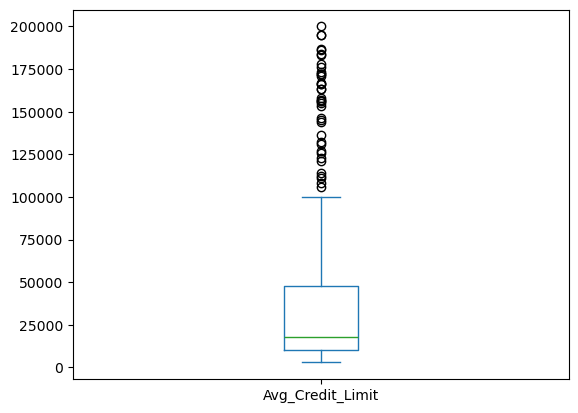

In [23]:
df_credit['Avg_Credit_Limit'].plot(kind='box')
df_credit.head(20)

Jumlah data sebelum dibuang outlier: 660
Jumlah data sesudah dibuang outlier: 621


<Axes: >

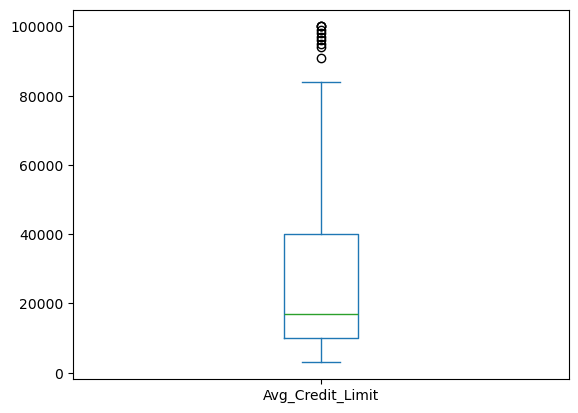

In [24]:
from pandas.api.types import is_numeric_dtype

def remove_outlier(data_frame, kolom_outlier):
    data_bersih = data_frame.copy()
    
    Q1 = data_bersih[kolom_outlier].quantile(0.25)
    Q3 = data_bersih[kolom_outlier].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data_bersih = data_bersih[(data_bersih[kolom_outlier] >= lower_bound) & 
                             (data_bersih[kolom_outlier] <= upper_bound)]
    return data_bersih

credit_clean = remove_outlier(df_credit, 'Avg_Credit_Limit')

print("Jumlah data sebelum dibuang outlier:", df_credit.shape[0])
print("Jumlah data sesudah dibuang outlier:", credit_clean.shape[0])

credit_clean['Avg_Credit_Limit'].plot(kind='box')

In [25]:
import warnings 
warnings.filterwarnings('ignore')
from yellowbrick.cluster import KElbowVisualizer 



kMeansC = KMeans(random_state=1)
vis = KElbowVisualizer(kMeansC, k=(2,11))  


vis.fit(credit_clean)


vis.show()


ModuleNotFoundError: No module named 'yellowbrick'

Silhouette Score K-Means for  2  clusters : 0.7275517813087928
Silhouette Score K-Means for  3  clusters : 0.7077390094589705
Silhouette Score K-Means for  4  clusters : 0.7094276225317143
Silhouette Score K-Means for  5  clusters : 0.5986950720392292
Silhouette Score K-Means for  6  clusters : 0.6271336425919736
Silhouette Score K-Means for  7  clusters : 0.618361421106118
Silhouette Score K-Means for  8  clusters : 0.6316464801024496
Silhouette Score K-Means for  9  clusters : 0.6115561113872093
Silhouette Score K-Means for  10  clusters : 0.6025062539666484


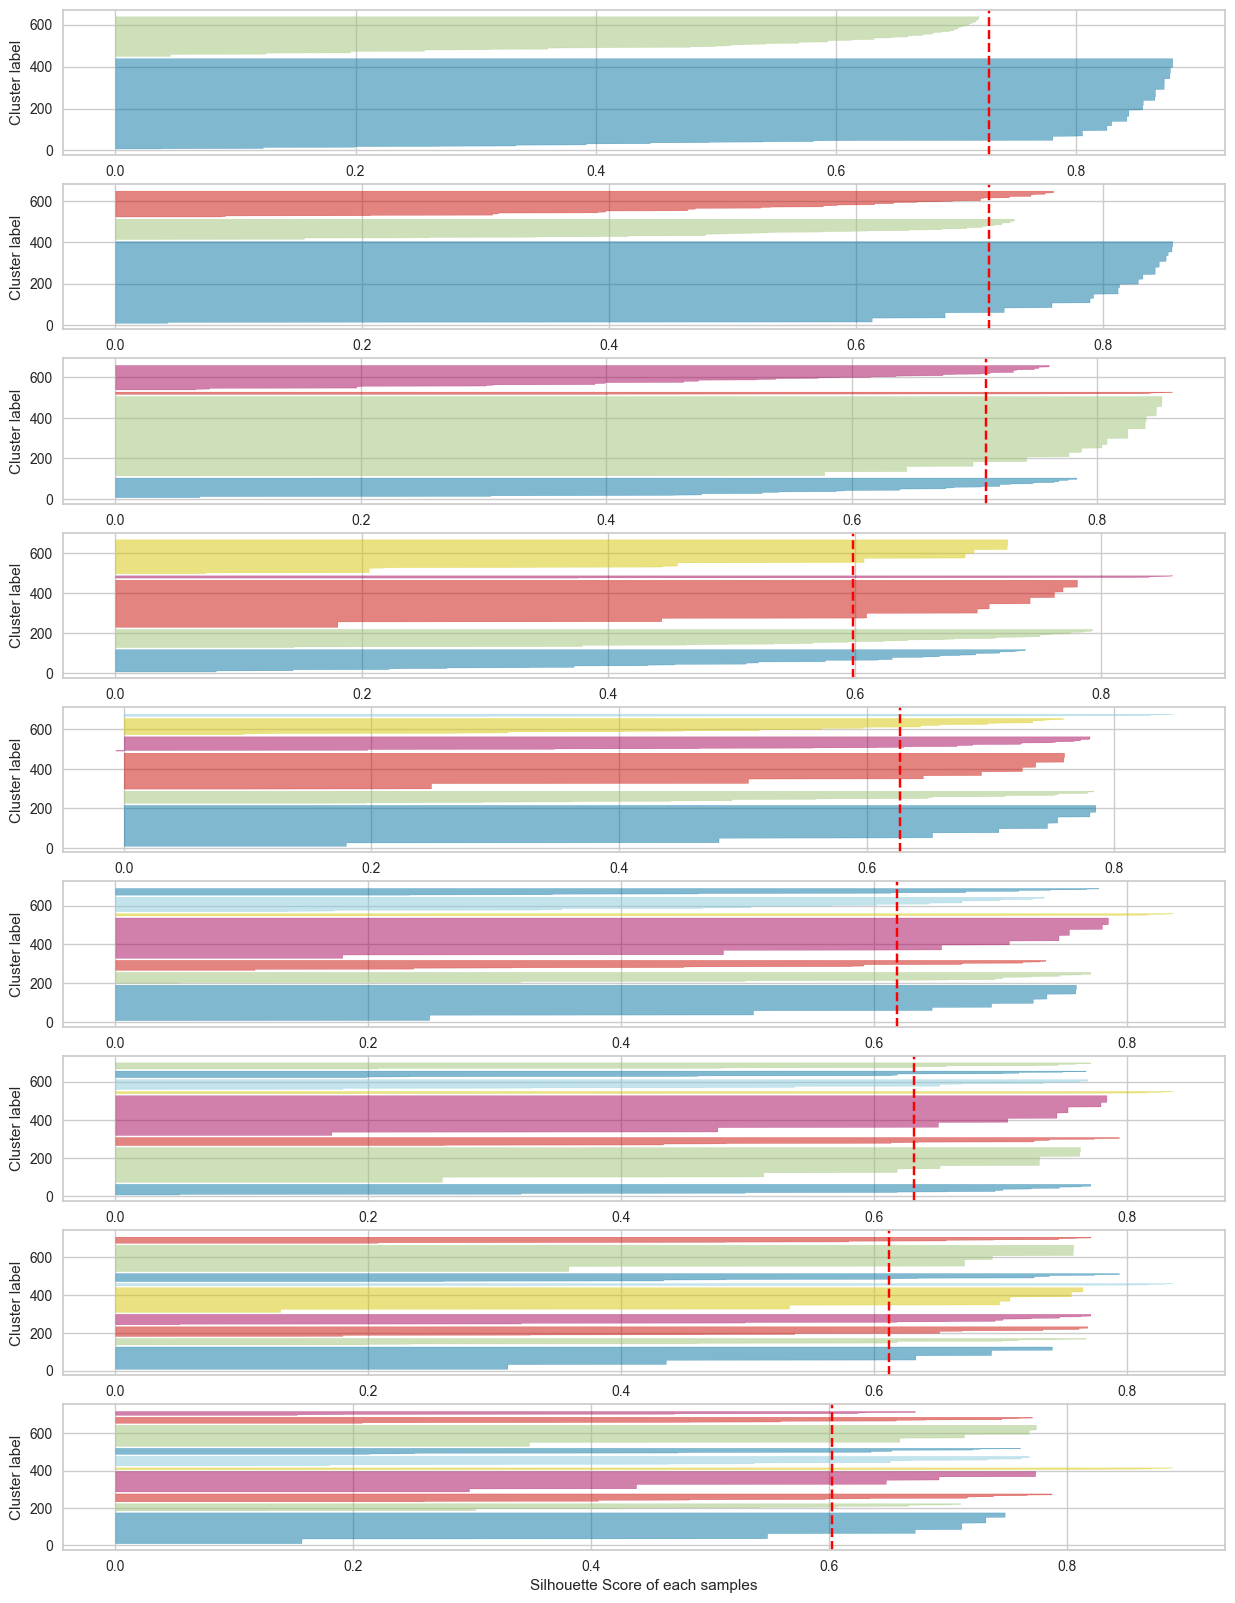

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(9,1, figsize=(15,20))

for k in np.arange(2,11):
    kMeansC = KMeans(n_clusters=k, init='k-means++', random_state=1)

    KM_cluster=kMeansC.fit_predict(credit_clean)

    print("Silhouette Score K-Means for ", k, " clusters :", silhouette_score(credit_clean, KM_cluster))

    sil_vis = SilhouetteVisualizer(kMeansC, colors='yellowbrick', ax=ax[k-2])

    sil_vis.fit(credit_clean)

    ax[k-2].set(xlabel="Silhouette Score of each samples", ylabel="Cluster label")

In [ ]:
credit_clean.columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'],
      dtype='object')

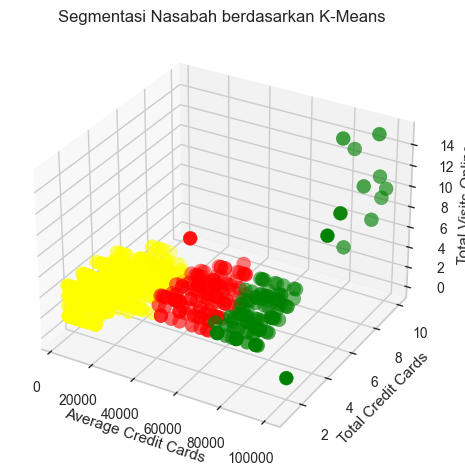

Silhouette Score K-Means: 0.708


In [ ]:
kmeans = KMeans(n_clusters = 3, init='k-means++', random_state = 92)
K_clusters = kmeans. fit_predict(credit_clean)

fig = plt.figure()
ax = plt.axes(projection='3d' )

cluster_colors = {0: 'red', 1: 'yellow', 2: 'green', 3:'blu', 4:'magenta', 5:'bleck', 6:'cyan'}

ax.scatter(credit_clean['Avg_Credit_Limit'], credit_clean['Total_Credit_Cards'], credit_clean['Total_visits_online' ],
           c=[cluster_colors[i] for i in K_clusters], s=100)

plt.title('Segmentasi Nasabah berdasarkan K-Means')
ax.set_xlabel('Average Credit Cards')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visits Online')
plt.show()

print ("Silhouette Score K-Means: %0.3f" % silhouette_score(credit_clean, K_clusters))

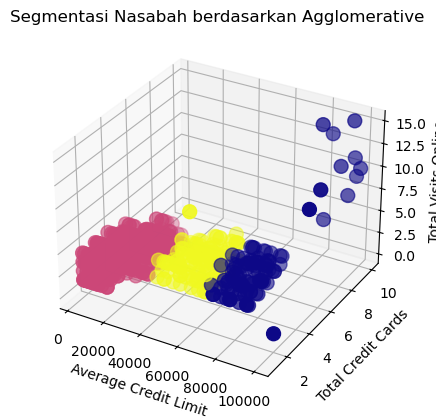

Silhouette Score K-Means: 0.705


In [ ]:
import seaborn as sns  
from matplotlib.colors import ListedColormap  

AGG = AgglomerativeClustering(n_clusters=3, linkage='ward')

AGG_clusters = AGG.fit_predict(credit_clean)  
cmap = ListedColormap(sns.color_palette("plasma", 256).as_hex())  

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(credit_clean['Avg_Credit_Limit'], credit_clean['Total_Credit_Cards'], credit_clean['Total_visits_online'],
           c=AGG_clusters, cmap=cmap, s=100)

plt.title('Segmentasi Nasabah berdasarkan Agglomerative')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total Credit Cards')  
ax.set_zlabel('Total Visits Online') 

plt.show() 

print("Silhouette Score K-Means: %0.3f" % silhouette_score(credit_clean, AGG_clusters))

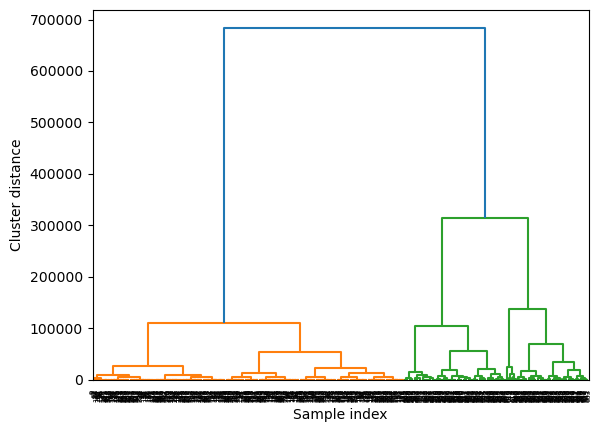

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_array = linkage(credit_clean, method='ward') 
dendrogram(linkage_array)

plt.xlabel("Sample index") 
plt.ylabel("Cluster distance") 
plt.show()

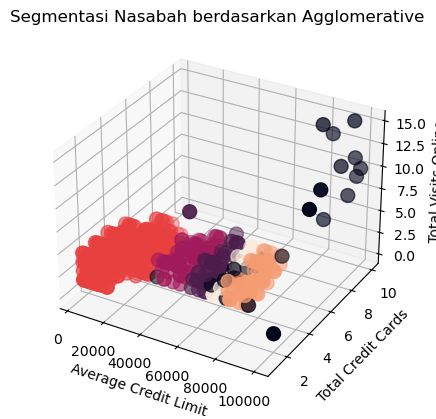

Silhouette Score K-Means: 0.657


In [ ]:
DBSC = DBSCAN(min_samples=20, eps=2500)

DBSC_clusters = DBSC.fit_predict(credit_clean)

from matplotlib.colors import ListedColormap  

cmap = ListedColormap(sns.color_palette("rocket", 256).as_hex())  

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(credit_clean['Avg_Credit_Limit'], credit_clean['Total_Credit_Cards'], credit_clean['Total_visits_online'],
           c=DBSC_clusters, cmap=cmap, s=100)

plt.title('Segmentasi Nasabah berdasarkan Agglomerative')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total Credit Cards')  
ax.set_zlabel('Total Visits Online') 

plt.show() 

print("Silhouette Score K-Means: %0.3f" % silhouette_score(credit_clean, DBSC_clusters))

In [29]:
import pickle

with open('KMeans_model.pkl', 'wb') as r:
    pickle.dump((KMeans), r)

with open('AGG_model.pkl','wb') as r:
    pickle.dump((AgglomerativeClustering), r)

with open('DBSCAN_model,pkl', 'wb') as r:
    pickle.dump((DBSCAN), r)

print("Model Berhasil Disimpan")

Model Berhasil Disimpan
